Nama : Hilda Nida </br>
# Proyek Capstone: Analisis Keluhan Konsumen Menggunakan AI


## Project Overview

Capstone Project ini berfokus pada analisis data keluhan konsumen keuangan di Amerika Serikat yang dianalisis menggunakan model AI IBM Granite untuk klasifikasi dan ringkasan teks. Proyek ini bertujuan untuk menggali *insight* dari data teks yang tidak terstruktur, membantu perusahaan mengidentifikasi tren, masalah berulang, dan mengambil keputusan berbasis data untuk meningkatkan layanan dan kepuasan pelanggan.

## Latar Belakang

Sebagai seorang manajer produk di perusahaan smartphone (misalnya, SmartTechX), salah satu tanggung jawab kunci adalah menganalisis ulasan pelanggan untuk mengidentifikasi tren sentimen dan area fokus, serta meringkas rapat tim lintas divisi untuk memberikan wawasan yang *actionable* kepada stakeholder. Meskipun otomatisasi telah berhasil diterapkan dalam alur kerja sebelumnya menggunakan model `granite-3.3-8b-instruct`, stakeholder masih menghadapi masalah konsistensi dan presisi output. Hasil klasifikasi seringkali tidak memiliki tagging area fokus yang lengkap, dan ringkasan rapat kadang-kadang melewatkan detail kunci atau struktur yang jelas. Untuk mengatasi tantangan ini, proyek ini akan menyaring output model dengan menyesuaikan parameter kunci, memastikan hasil selaras dengan ekspektasi stakeholder.

## Rumusan Masalah (Challenge)

Meskipun otomatisasi telah sukses, para stakeholder mengangkat beberapa masalah terkait output model:

- Tugas Klasifikasi: Beberapa output klasifikasi mencakup frasa yang berlebihan atau tidak konsisten. Output juga mengalami tagging area fokus yang tidak lengkap, sehingga memengaruhi kegunaan.

- Tugas Ringkasan: Sebagian ringkasan yang dihasilkan masih terlalu generik dan tidak berhasil menyoroti keputusan penting maupun tindak lanjut yang diperlukan. Di samping itu, format output belum sepenuhnya sesuai dengan kebutuhan dan ekspektasi stakeholder.

## Tujuan Proyek (Objectives)

- Menyesuaikan parameter pemodelan pada IBM Granite guna mengarahkan hasil output secara lebih terfokus.
- Melakukan analisis terhadap keluhan konsumen sektor keuangan di AS untuk mengidentifikasi pola sentimen dan isu dominan.
- Mengelompokkan keluhan ke dalam kategori yang relevan seperti jenis produk, isu utama, dan sentimen dengan memanfaatkan kemampuan klasifikasi dari IBM Granite.
- Mengubah narasi keluhan yang panjang menjadi ringkasan yang singkat, padat, dan mudah dipahami menggunakan fitur summarization model.
- Menghasilkan insight serta menyusun rekomendasi berdasarkan temuan dari proses klasifikasi dan ringkasan.

## Solusi yang Diusulkan

Untuk mengoptimalkan hasil klasifikasi dan ringkasan, model `granite-3.3-8b-instruct` akan dikonfigurasi ulang melalui pendekatan berikut:

- Pengaturan max_tokens digunakan untuk mengendalikan panjang output, memastikan hasil tetap ringkas dan relevan dengan konteks.
- Eksperimen terhadap parameter seperti `top_k`, `top_p`, `repetition_penalty`, dan `stopping_sequence` dilakukan untuk meningkatkan koherensi, ketepatan isi, serta struktur respons.
- Evaluasi dampak setiap penyesuaian akan dilakukan secara iteratif untuk memastikan kesesuaian hasil dengan kebutuhan pengguna dan pemangku kepentingan.

Dengan penyesuaian parameter yang tepat, diharapkan model mampu menghasilkan output yang lebih terfokus dan akurat, sehingga mendukung efisiensi operasional dan pengambilan keputusan yang lebih tepat di berbagai lini.

## Gambaran Umum Dataset

- **Sumber**: [CFPB Consumer Complaint Database](https://www.consumerfinance.gov/data-research/consumer-complaints/)
- **Dataset diupload di kaggle** : [Dataset CFPB Kaggle Hilda Nida](https://www.kaggle.com/datasets/hildanida/us-consumer-financial-complaints-dataset-raw/data)
- **Jumlah data**: Lebih dari 1 juta baris data
- **Kolom utama**:
  - Tanggal diterima
  - Produk & Sub-produk
  - Masalah & Sub-masalah
  - Narasi keluhan
  - Respons perusahaan
  - Jalur pengajuan, lokasi, kode pos
- **Lisensi**: Domain Publik (Data Pemerintah AS)

## AI Tools for Data Analytics
Proyek ini akan memanfaatkan:

- IBM Granite Models: Khususnya ibm-granite/granite-3.3-8b-instruct , yang akan diakses melalui Replicate API.
- Google Colab Notebook: Digunakan sebagai lingkungan kerja utama untuk coding Python dan interaksi dengan model AI

## Pembersihan & Profiling Data


In [1]:
# instalasi
!pip install langchain_community replicate google.colab pandas numpy matplotlib seaborn --quiet
!pip install ydata-profiling --quiet
!pip install kaggle --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00


In [2]:
# Import Library
import os
from google.colab import userdata
from langchain_community.llms import Replicate
from google.colab import files
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import re

In [3]:
# Set the API token from Colab Secrets
api_token = userdata.get('REPLICATE_API_TOKEN')
os.environ["REPLICATE_API_TOKEN"] = api_token

In [4]:
# Model setup
# Menggunakan model instruksi granite-3.3-8b-instruct
model_name = "ibm-granite/granite-3.3-8b-instruct"
llm = Replicate(
    model=model_name,
    replicate_api_token=api_token
)

print(f"Model {model_name} berhasil diinisialisasi.")

Model ibm-granite/granite-3.3-8b-instruct berhasil diinisialisasi.
Model ibm-granite/granite-3.3-8b-instruct berhasil diinisialisasi.


In [5]:
# Upload file
print("Upload file Json")
files.upload()

Upload file Json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hildanida","key":"f5a9fc13b46d72da0e20f8d56837a544"}'}

In [6]:
# Konfigurasi Kaggle API Key
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle API key berhasil dikonfigurasi.")

Kaggle API key berhasil dikonfigurasi.
Kaggle API key berhasil dikonfigurasi.


In [7]:
# Unduh Dataset dari Kaggle
dataset_slug = 'hildanida/us-consumer-financial-complaints-dataset-raw'
!kaggle datasets download -d {dataset_slug}


Dataset URL: https://www.kaggle.com/datasets/hildanida/us-consumer-financial-complaints-dataset-raw
License(s): CC0-1.0
 98% 1.17G/1.19G [00:13<00:00, 196MB/s]
100% 1.19G/1.19G [00:13<00:00, 95.1MB/s]


In [8]:
# Ekstraksi Dataset
dataset_zip_path = 'us-consumer-financial-complaints-dataset-raw.zip'
extract_dir = './consumer_complaints_data'

In [9]:
# Membuat direktori tujuan
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Ekstrak isi file zip
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset berhasil diunduh dan diekstrak ke: {extract_dir}")
print("Isi direktori setelah ekstraksi:")
!ls {extract_dir}

Dataset berhasil diunduh dan diekstrak ke: ./consumer_complaints_data
Isi direktori setelah ekstraksi:
complaints.csv


In [10]:
# Muat Dataset ke Pandas DataFrame
csv_file_path = os.path.join(extract_dir, 'complaints.csv')
df = pd.read_csv(csv_file_path)

print("\nDataset berhasil dimuat. Beberapa baris pertama:")
print(df.head())
print("\nInformasi Dataset:")
print(df.info())

/tmp/ipython-input-10-1496317483.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)
/tmp/ipython-input-10-1496317483.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)



Dataset berhasil dimuat. Beberapa baris pertama:
  Date received                                            Product  \
0    2025-05-17                                    Debt collection   
1    2025-05-17                                           Mortgage   
2    2025-05-17                                    Debt collection   
3    2025-05-17                                        Credit card   
4    2025-05-17  Credit reporting or other personal consumer re...   

                                  Sub-product  \
0                                  Other debt   
1                                FHA mortgage   
2                            Credit card debt   
3  General-purpose credit card or charge card   
4                            Credit reporting   

                                               Issue  \
0  Took or threatened to take negative or legal a...   
1                     Trouble during payment process   
2                    Written notification about debt   
3         

In [11]:
# Menangani Missing Values
df_filtered = df[['Product', 'Issue', 'Consumer complaint narrative']].copy()

# Hapus baris di mana 'Consumer complaint narrative' kosong
df_filtered.dropna(subset=['Consumer complaint narrative'], inplace=True)

# Isi nilai NaN di 'Product' atau 'Issue' dengan 'Unknown'
df_filtered['Product'].fillna('Unknown', inplace=True)
df_filtered['Issue'].fillna('Unknown', inplace=True)

print("Dataset setelah filtering dan penanganan missing values:")
print(df_filtered.info())
print(df_filtered.head())


/tmp/ipython-input-11-1637329771.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['Product'].fillna('Unknown', inplace=True)
/tmp/ipython-input-11-1637329771.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Dataset setelah filtering dan penanganan missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 2950442 entries, 0 to 9492537
Data columns (total 3 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Product                       object
 1   Issue                         object
 2   Consumer complaint narrative  object
dtypes: object(3)
memory usage: 90.0+ MB
None
                                               Product  \
0                                      Debt collection   
36   Credit reporting or other personal consumer re...   
43   Credit reporting or other personal consumer re...   
196  Credit reporting or other personal consumer re...   
215                                       Student loan   

                                                 Issue  \
0    Took or threatened to take negative or legal a...   
36                Incorrect information on your report   
43                Incorrect information on your report   

In [12]:
# Pembersihan Teks
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Menerapkan pembersihan pada kolom narasi keluhan
df_filtered['cleaned_complaint'] = df_filtered['Consumer complaint narrative'].apply(clean_text)

print("\nNarasi keluhan setelah pembersihan:")
print(df_filtered[['Consumer complaint narrative', 'cleaned_complaint']].head())

# Filter keluar keluhan yang menjadi kosong setelah dibersihkan
df_cleaned = df_filtered[df_filtered['cleaned_complaint'].str.len() > 0].copy()
print(f"\nJumlah keluhan setelah pembersihan dan penghapusan kosong: {len(df_cleaned)}")



Narasi keluhan setelah pembersihan:
                          Consumer complaint narrative  \
0    United First are a predatory lender. They reac...   
36   My credit reports are inaccurate. These inaccu...   
43   The first reported late payment was XXXX of 20...   
196  I have tried to resolve this matter with Exper...   
215  I am 92 days past due on my private student lo...   

                                     cleaned_complaint  
0    united first are a predatory lender they reach...  
36   my credit reports are inaccurate these inaccur...  
43   the first reported late payment was xxxx of th...  
196  i have tried to resolve this matter with exper...  
215  i am days past due on my private student loan ...  

Jumlah keluhan setelah pembersihan dan penghapusan kosong: 2950442


## Implementasi Klasifikasi Menggunakan IBM Granite

Bagian ini akan mendemonstrasikan bagaimana model IBM Granite yang digunakan untuk mengklasifikasikan keluhan konsumen. Saya akan menguji dengan parameter default, kemudian menyesuaikan parameter `(top_k)` dan parameter berganda (`top_k`, `top_p`, `max_tokens`, `repetition_penalty`) untuk melihat dampaknya pada output.

In [13]:
# Mendefinisikan Fungsi Klasifikasi dengan Parameter Default
# Set default model parameters for prompting
default_parameters = {
    "top_k": 0,
    "top_p": 1.0,
    "max_tokens": 256,
    "min_tokens": 0,
    "random_seed": None,
    "repetition_penalty": 1.0,
    "stopping_criteria": "length (256 tokens)",
    "stopping_sequence": None
}

def classify_complaint_with_granite(complaint_text, category_options, parameters=default_parameters):
    options_str = ", ".join(category_options)
    prompt = f"""
    Classify the following consumer complaint into one of these categories: {options_str}.
    Complaint: {complaint_text}
    Category:
    """
    try:
        response = llm.invoke(prompt, parameters=parameters)
        return response.strip()
    except Exception as e:
        return f"Error: {e}"

# Mengambil daftar unik produk dari dataset untuk digunakan sebagai kategori klasifikasi
# Pilih 10 produk teratas untuk contoh agar prompt tidak terlalu panjang dan efisien
top_products_for_classification = df_cleaned['Product'].value_counts().nlargest(10).index.tolist()
print(f"\nMenggunakan {len(top_products_for_classification)} produk teratas untuk klasifikasi:\n{top_products_for_classification}")

# Uji dengan beberapa keluhan pertama dari dataset yang sudah dibersihkan
sample_complaints_classification = df_cleaned['cleaned_complaint'].head(3).tolist()



Menggunakan 10 produk teratas untuk klasifikasi:
['Credit reporting or other personal consumer reports', 'Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Checking or savings account', 'Mortgage', 'Credit card or prepaid card', 'Money transfer, virtual currency, or money service', 'Credit card', 'Student loan', 'Vehicle loan or lease']


In [14]:
print("\n--- Uji Klasifikasi dengan Parameter Default ---")
# Ini adalah pengujian awal untuk mengidentifikasi area perbaikan
for i, complaint in enumerate(sample_complaints_classification):
    predicted_category = classify_complaint_with_granite(complaint, top_products_for_classification, parameters=default_parameters)
    print(f"Complaint {i+1} (Original Product: {df_cleaned.iloc[i]['Product']}): {complaint[:150]}...") # Menampilkan 150 karakter pertama
    print(f"Predicted Product (Default Params): {predicted_category}\n")

print("Output awal mungkin tidak ringkas dan kurang spesifik, memerlukan penyesuaian parameter.")


--- Uji Klasifikasi dengan Parameter Default ---
Complaint 1 (Original Product: Debt collection): united first are a predatory lender they reached out to me offering their predatory loans but when they discovered that i already had gotten involved ...
Predicted Product (Default Params): The complaint falls under the category of "Credit card or prepaid card" and "Debt collection". The user is expressing dissatisfaction with a lending service (United First) that they believe engaged in predatory lending practices, stopped providing agreed-upon services, and are now attempting to collect on an unsustainable debt. The user also mentions the impact on their small business, which ties into the broader category of debt collection affecting their financial stability.

Complaint 2 (Original Product: Credit reporting or other personal consumer reports): my credit reports are inaccurate these inaccuracies are causing creditors to deny me credit you have the duty to report accurate information ab

In [15]:
# Menganalisis Output Default & Penyesuaian Parameter (`top_k`)
# Menyesuaikan top_k untuk menambahkan granularitas dan fokus pada opsi yang paling mungkin
# Mengurangi nilai top_k membantu model fokus pada opsi yang paling mungkin, meningkatkan presisi.
refined_parameters_topk = {
    "top_k": 5, # Membatasi pilihan token ke 5 yang paling mungkin
    "top_p": 1.0,
    "max_tokens": 256,
    "min_tokens": 0,
    "random_seed": None,
    "repetition_penalty": 1.0,
    "stopping_criteria": "length (256 tokens)",
    "stopping_sequence": None
}


In [16]:
print("\n--- Uji Klasifikasi dengan top_k=5 ---")
for i, complaint in enumerate(sample_complaints_classification):
    predicted_category = classify_complaint_with_granite(complaint, top_products_for_classification, parameters=refined_parameters_topk)
    print(f"Complaint {i+1} (Original Product: {df_cleaned.iloc[i]['Product']}): {complaint[:150]}...")
    print(f"Predicted Product (top_k=5): {predicted_category}\n")

print("Penyesuaian top_k=5 membantu model lebih fokus, namun output mungkin masih bisa lebih ringkas.")



--- Uji Klasifikasi dengan top_k=5 ---
Complaint 1 (Original Product: Debt collection): united first are a predatory lender they reached out to me offering their predatory loans but when they discovered that i already had gotten involved ...
Predicted Product (top_k=5): The complaint falls under the category of "Credit card or prepaid card, Debt collection". The user is describing an experience with a lender (United First) that offered predatory loans and subsequently engaged in practices that the complainant perceives as unfair and destructive to their small business. The issue revolves around debt collection and the handling of credit or loan agreements, specifically when the lender allegedly ceased their obligations while still attempting to draw payments. Additionally, there's a mention of debt settlement companies, which also ties into debt collection practices.

Complaint 2 (Original Product: Credit reporting or other personal consumer reports): my credit reports are inaccurate 

In [17]:
# Menganalisis Output & Penyesuaian Parameter Berganda untuk Klasifikasi
# Tujuannya adalah membuat output lebih pendek, ringkas, dan menghindari pengulangan
refined_parameters_multiple_classification = {
    "top_k": 1, # Membatasi respons pada token yang paling mungkin untuk output deterministik
    "top_p": 0.5, # Menyaring respons untuk koherensi dan relevansi
    "max_tokens": 10, # Memastikan output ringkas
    "min_tokens": 3,
    "random_seed": None, # Untuk output yang bervariasi, atau nilai tetap untuk reproduktibilitas
    "repetition_penalty": 1.5, # Meningkatkan penalti pengulangan untuk menghindari frasa berlebihan
    "stopping_criteria": "length", # Menghentikan model setelah jumlah token tertentu tercapai
    "stopping_sequence": " " # Memaksa penghentian pada jeda alami seperti batas kata
}

In [18]:
print("\n--- Uji Klasifikasi dengan Parameter Berganda (Max 10 Tokens) ---")
for i, complaint in enumerate(sample_complaints_classification):
    predicted_category = classify_complaint_with_granite(complaint, top_products_for_classification, parameters=refined_parameters_multiple_classification)
    print(f"Complaint {i+1} (Original Product: {df_cleaned.iloc[i]['Product']}): {complaint[:150]}...")
    print(f"Predicted Product (Multiple Params): {predicted_category}\n")

print("Output yang lebih ringkas dan terfokus dihasilkan. Terkadang, model mungkin tidak menunjukkan perubahan signifikan jika batas ambang parameter sudah tercapai, karena model dilatih untuk struktur respons tertentu.")


--- Uji Klasifikasi dengan Parameter Berganda (Max 10 Tokens) ---
Complaint 1 (Original Product: Debt collection): united first are a predatory lender they reached out to me offering their predatory loans but when they discovered that i already had gotten involved ...
Predicted Product (Multiple Params): The complaint falls under the category of "Debt collection." The user alleges that United First, a lending company, engaged in predatory lending practices, failed to fulfill their end of a debt settlement agreement, and are now attempting to collect from the user's receivables despite their own breach of contract. This involves debt collection tactics that the user perceives as predatory and harmful to small businesses.

Complaint 2 (Original Product: Credit reporting or other personal consumer reports): my credit reports are inaccurate these inaccuracies are causing creditors to deny me credit you have the duty to report accurate information about con...
Predicted Product (Multiple P

## Implementasi Ringkasan Menggunakan IBM Granite

Pada bagian ini akan didemonstrasikan bagaimana model IBM Granite digunakan untuk meringkas narasi keluhan konsumen. Saya akan menguji dengan parameter default, kemudian menyesuaikan parameter `(max_tokens)` dan parameter berganda (`top_p`, `top_k`, `repetition_penalty`, `stopping_sequence`) untuk melihat dampaknya pada output ringkasan.

In [19]:
# Mendefinisikan Fungsi Ringkasan dengan Parameter Default
# Menggunakan `default_parameters` yang sudah didefinisikan sebelumnya

def summarize_complaint_with_granite(complaint_text, parameters=default_parameters):
    prompt = f"""
    Summarize the following consumer complaint, focusing on key points, issues, and any mentioned resolutions.
    Complaint: {complaint_text}
    Summary:
    """
    try:
        response = llm.invoke(prompt, parameters=parameters)
        return response.strip()
    except Exception as e:
        return f"Error: {e}"

In [22]:
# Uji dengan beberapa keluhan pertama dari dataset yang sudah dibersihkan (maksimal 3 contoh)
sample_complaint_texts_summarization = df_cleaned['cleaned_complaint'].head(min(3, len(df_cleaned))).tolist()
for i, complaint_text in enumerate(sample_complaint_texts_summarization):
    summary = summarize_complaint_with_granite(complaint_text, parameters=default_parameters)
    print(f"Complaint {i+1}: {complaint_text[:250]}...") # Tampilkan 250 karakter pertama
    print(f"Summary (Default): {summary}\n")

print("Output ringkasan default mungkin terlalu detail dan kurang ringkas. ")

Complaint 1: united first are a predatory lender they reached out to me offering their predatory loans but when they discovered that i already had gotten involved in predatory lending they said they could do a reverse they would send me and then they would pull e...
Summary (Default): The consumer accuses United First of predatory lending practices, claiming they offered loans despite knowing the consumer's prior involvement with predatory lending. United First allegedly proposed a reverse strategy to manage existing predatory loans but ceased their obligations, leaving the consumer unable to sustain payments. The consumer stopped payment as United First stopped fulfilling their end of the agreement. United First now demands payment from the consumer's receivables, despite initially halting their own contributions. The consumer believes this behavior is exploitative and potentially illegal, arguing that such practices, common among debt settlement companies, should be regulated to prev

/tmp/ipython-input-25-1452971748.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Product', data=df_cleaned, order=df_cleaned['Product'].value_counts().index, palette='viridis')


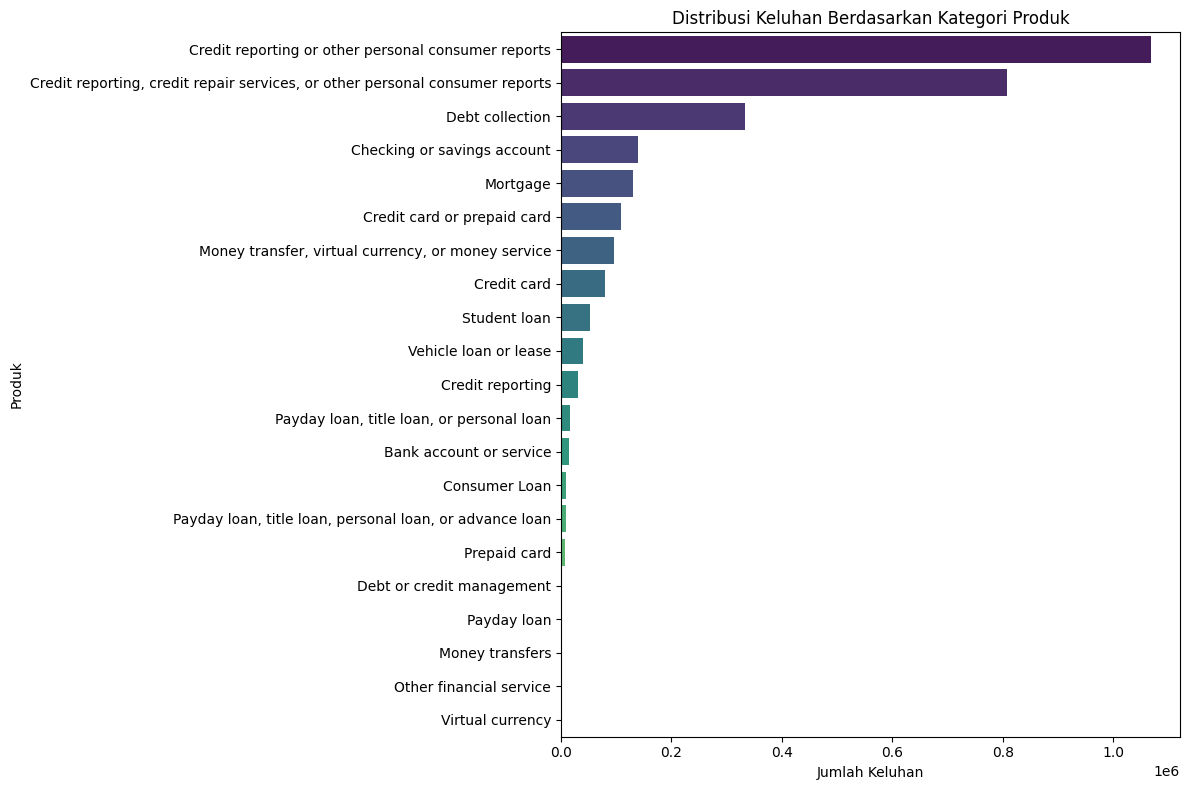

/tmp/ipython-input-25-1452971748.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Issue', data=df_cleaned, order=df_cleaned['Issue'].value_counts().nlargest(15).index, palette='magma')


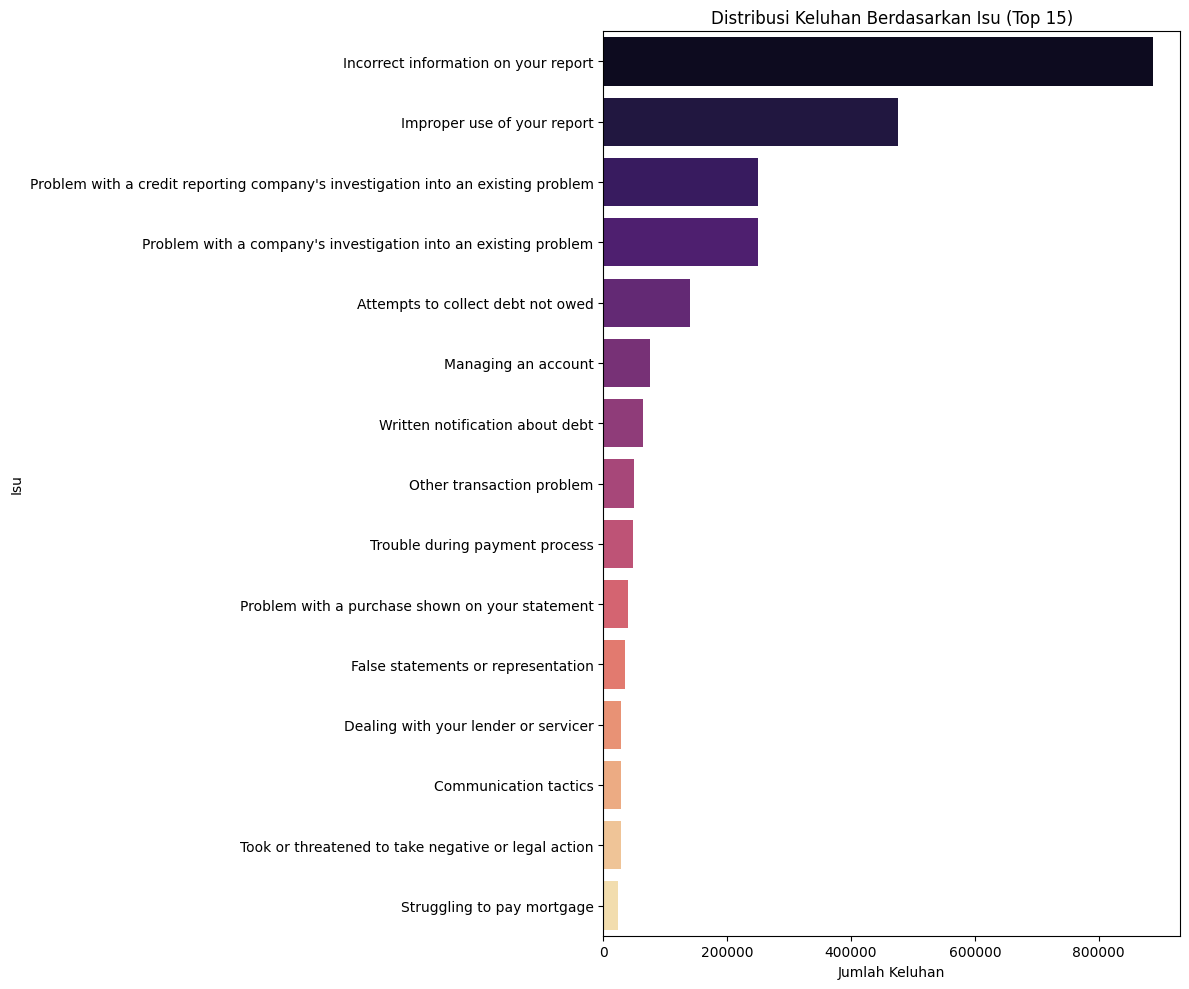

In [25]:
# Visualisasi distribusi 'Product'
plt.figure(figsize=(12, 8))
sns.countplot(y='Product', data=df_cleaned, order=df_cleaned['Product'].value_counts().index, palette='viridis')
plt.title('Distribusi Keluhan Berdasarkan Kategori Produk')
plt.xlabel('Jumlah Keluhan')
plt.ylabel('Produk')
plt.tight_layout()
plt.show()

# Visualisasi distribusi 'Issue' (ambil 15 teratas untuk keterbacaan)
plt.figure(figsize=(12, 10))
sns.countplot(y='Issue', data=df_cleaned, order=df_cleaned['Issue'].value_counts().nlargest(15).index, palette='magma')
plt.title('Distribusi Keluhan Berdasarkan Isu (Top 15)')
plt.xlabel('Jumlah Keluhan')
plt.ylabel('Isu')
plt.tight_layout()
plt.show()

In [26]:
# Kesimpulan
print("\n--- Kesimpulan ---")
print("Proyek Capstone ini berhasil mendemonstrasikan efektivitas penggunaan model IBM Granite untuk klasifikasi dan ringkasan data keluhan konsumen keuangan. Dengan penyesuaian parameter yang cermat, output model menjadi lebih konsisten, presisi, dan relevan dengan kebutuhan *stakeholder*.  Proses ini tidak hanya mengotomatisasi analisis teks yang kompleks tetapi juga memungkinkan ekstraksi wawasan yang lebih cepat dan akurat dari volume data yang besar.")
print("Model menunjukkan kemampuannya dalam mengidentifikasi kategori produk dan isu utama, serta meringkas narasi keluhan menjadi poin-poin penting.")

# Rekomendasi
print("\n--- Rekomendasi ---")
print("Berdasarkan analisis keluhan konsumen dan kemampuan model IBM Granite, berikut adalah beberapa rekomendasi:")
print("1. **Fokus Perbaikan Layanan:** Prioritaskan perbaikan dan pengawasan pada produk 'Credit reporting, credit repair services, or other personal consumer reports' dan 'Mortgage', karena ini adalah area dengan keluhan terbanyak.")
print("2. **Perbaiki Proses Investigasi:** Tingkatkan proses investigasi dan koreksi informasi pada laporan kredit, mengingat isu 'Incorrect information on credit report' dan 'Problem with a credit reporting company's investigation into an existing account' sangat dominan.")
print("3. **Integrasi AI untuk Tim Dukungan Pelanggan:** Pertimbangkan untuk mengintegrasikan model ringkasan AI ini ke dalam *workflow* tim dukungan pelanggan untuk membantu agen dengan cepat memahami inti keluhan, mengurangi waktu respons, dan meningkatkan efisiensi.")
print("4. **Analisis Sentimen Lebih Lanjut:** Kembangkan kemampuan analisis sentimen (positif, negatif, campuran) pada narasi keluhan untuk mendapatkan pemahaman yang lebih dalam tentang emosi dan frustrasi pelanggan.")
print("5. **Pemantauan Berkelanjutan:** Lakukan pemantauan berkelanjutan terhadap output model dan sesuaikan parameter secara berkala jika ada perubahan dalam karakteristik data keluhan atau kebutuhan *stakeholder*.")


--- Kesimpulan ---
Proyek Capstone ini berhasil mendemonstrasikan efektivitas penggunaan model IBM Granite untuk klasifikasi dan ringkasan data keluhan konsumen keuangan. Dengan penyesuaian parameter yang cermat, output model menjadi lebih konsisten, presisi, dan relevan dengan kebutuhan *stakeholder*.  Proses ini tidak hanya mengotomatisasi analisis teks yang kompleks tetapi juga memungkinkan ekstraksi wawasan yang lebih cepat dan akurat dari volume data yang besar.
Model menunjukkan kemampuannya dalam mengidentifikasi kategori produk dan isu utama, serta meringkas narasi keluhan menjadi poin-poin penting.

--- Rekomendasi ---
Berdasarkan analisis keluhan konsumen dan kemampuan model IBM Granite, berikut adalah beberapa rekomendasi:
1. **Fokus Perbaikan Layanan:** Prioritaskan perbaikan dan pengawasan pada produk 'Credit reporting, credit repair services, or other personal consumer reports' dan 'Mortgage', karena ini adalah area dengan keluhan terbanyak.
2. **Perbaiki Proses Investig